# Titanic Suvivability Prediction

    * Dimension Reduction : Principle Component Analysis (PCA)
    * Unsupervised Models : K-means Clustering, T-SNE
    * Supervised Models : Logistic Regression, Random Forest, SVM
    

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data preparation, model building and accuracy checking libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import os #For creating and removing submission files

#  The following is the structure of the dataset.
    * Variable Name	Description	Sample Data
    * Survived      Survival status   (0 = No, 1 = Yes)
    * Pclass	    Ticket class      (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower)
    * SibSp	     No of siblings / spouses aboard the Titanic
    * Parch	     # of parents / children aboard the Titanic
    * Embarked      Embarkation port  (C = Cherbourg, Q = Queenstown, S = Southampton) 

In [80]:
#Reading the training data from the CSV file:
train = pd.read_csv("./titanic_train.csv") 
print(len(train))
train.head()


891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
print(len(train.loc[train["Survived"] == 1]))
print(len(train.loc[train["Survived"] == 0]))

342
549


In [3]:
#Reading the testing data from the CSV file:
test = pd.read_csv("./titanic_test.csv")
print(test.shape)
test

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
#Extracting the target variable from the training dataset and then dropping it.
train1 = train.copy()
y_train = train1.Survived
train1.drop(['Survived'], axis = 1, inplace = True)
train1.shape

(891, 11)

In [5]:
#Concatenating the training and testing set:
comb = pd.concat([train1,test], axis = 0, ignore_index= True)
comb.shape

(1309, 11)

In [6]:
comb

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
#Information about the combined dataset:
comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [8]:
#Checking null values:
comb.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
#Replacing the null values with 'N/A' strings in the 'Cabin' column:
comb['Cabin'].fillna('N/A', inplace = True)

In [10]:
#Filling the missing values in the embarked column with the mode of the column:
comb['Embarked'].fillna((comb['Embarked'].mode()[0]), inplace = True)

In [11]:
#Defining a function to extract the honorific from a name:
def extract_honorific(name):
    record = False
    honorific = ''
    for i, char in enumerate(name):
        if char == ',':
            record = True
        if char == '.':
            record = False
        if record == True:
            honorific += name[i + 2]
    return honorific[:-1]

#Finding the honorifics of all the passengers:
honorifics = [extract_honorific(name) for name in comb.Name]

#Creating a new "Honorific" column:
comb.insert(3, "Honorific", honorifics)
comb.head()


,PassengerId,Pclass,Name,Honorific,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",Mr.,male,22.0,1,0,A/5 21171,7.2500,N/A,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",Mr.,male,35.0,0,0,373450,8.0500,N/A,S


In [12]:
#Checking the count of each unique honorific:
comb.Honorific.value_counts()

Mr.              757
Miss.            260
Mrs.             197
Master.           61
Rev.               8
Dr.                8
Col.               4
Mlle.              2
Major.             2
Ms.                2
Lady.              1
Sir.               1
Mme.               1
Don.               1
Capt.              1
the Countess.      1
Jonkheer.          1
Dona.              1
Name: Honorific, dtype: int64

In [13]:
#Checking the honorific-wise median age:
median_ages = pd.Series(comb.groupby(by = 'Honorific')['Age'].median())
median_ages.sort_values(ascending = False)

Honorific
Capt.            70.0
Col.             54.5
Dr.              49.0
Sir.             49.0
Major.           48.5
Lady.            48.0
Rev.             41.5
Don.             40.0
Dona.            39.0
Jonkheer.        38.0
Mrs.             35.5
the Countess.    33.0
Mr.              29.0
Ms.              28.0
Mme.             24.0
Mlle.            24.0
Miss.            22.0
Master.           4.0
Name: Age, dtype: float64

In [14]:
#Grouping the data by honorifics and filling the missing age values:
comb1 = pd.DataFrame(columns = comb.columns)

honorificGroup = comb.groupby(by = 'Honorific')
for _, df_honorific in honorificGroup:
    df_honorific['Age'].fillna(df_honorific['Age'].median(), inplace = True)
    comb1 = pd.concat([comb1, df_honorific], axis = 0)

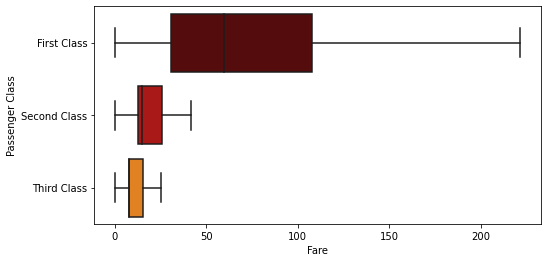

In [15]:
#Checking correlation between Pclass and Fare:
plt.figure(figsize = (8, 4))
sns.boxplot(y = comb1.Pclass, x = comb1.Fare, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Passenger Class')
plt.yticks([0,1,2], ['First Class','Second Class', 'Third Class'])
plt.show()

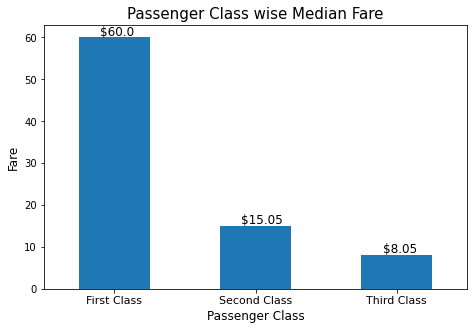

In [98]:
#Checking the passenger-class-wise median fare:
median_fares = pd.Series(comb1.groupby(by = 'Pclass')['Fare'].median())
plt.figure(figsize = (5,3))
median_fares.plot(kind = 'bar')
plt.text(x = -0.1, y = median_fares.loc[1] + 0.5, s = "${}".format(median_fares.loc[1].round(2)), fontsize = 12)
plt.text(x = -0.1 + 1, y = median_fares.loc[2] + 0.5, s = "${}".format(median_fares.loc[2].round(2)), fontsize = 12)
plt.text(x = -0.1 + 2, y = median_fares.loc[3] + 0.5, s = "${}".format(median_fares.loc[3].round(2)), fontsize = 12)
plt.xlabel('Passenger Class', fontsize = 12)
plt.ylabel('Fare', fontsize = 12)
plt.title('Passenger Class wise Median Fare', fontsize = 15)
plt.xticks([0,1,2], ['First Class', 'Second Class', 'Third Class'], rotation = 'horizontal', fontsize = 11)
plt.tight_layout(pad = -5)
plt.show()

In [17]:
#Grouping the data by passenger-class and filling the missing 'Fare' values:
comb2 = pd.DataFrame(columns = comb1.columns)

pclassGroup = comb1.groupby(by = 'Pclass')
for _, df_pclass in pclassGroup:
    df_pclass['Fare'].fillna(df_pclass['Fare'].median(), inplace = True)
    comb2 = pd.concat([comb2, df_pclass], axis = 0)


In [18]:
#Re-checking for null values:
comb2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Honorific      0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

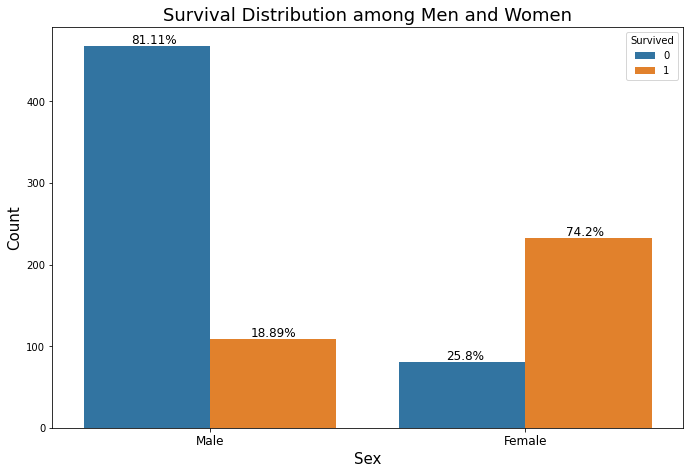

In [97]:
#Visualising Sex w.r.t Survival:
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
sexSurvival = temp.groupby(by = 'Sex')['Survived'].value_counts()
plt.figure(figsize = (8, 5))
sns.countplot(data = temp, x = 'Sex',  hue = 'Survived')
plt.text(x = -0.25, y = sexSurvival['male'][0] + 3, s = "{}%".format(((sexSurvival['male'][0]/sexSurvival['male'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.13, y = sexSurvival['male'][1] + 3, s = "{}%".format(((sexSurvival['male'][1]/sexSurvival['male'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.25 + 1, y = sexSurvival['female'][0] + 3, s = "{}%".format(((sexSurvival['female'][0]/sexSurvival['female'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.13 + 1, y = sexSurvival['female'][1] + 3, s = "{}%".format(((sexSurvival['female'][1]/sexSurvival['female'].sum())*100).round(2)), fontsize = 12)
plt.title('Survival Distribution among Men and Women', fontsize = 18)
plt.xticks([0, 1], ['Male', 'Female'], fontsize = 12)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout(pad = -5)
plt.show()

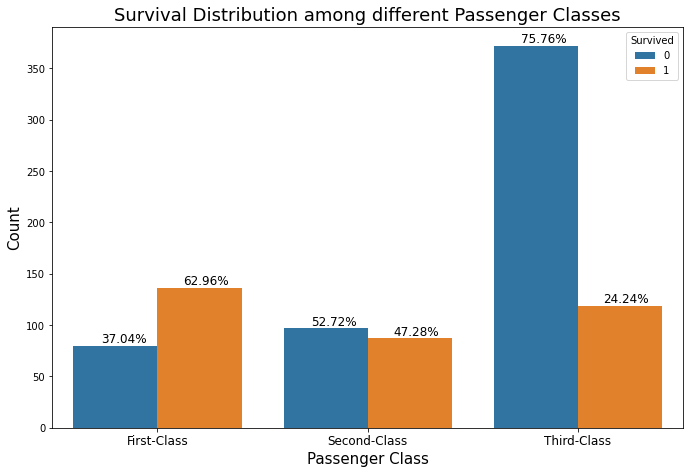

In [99]:
#Visualising Pclass w.r.t Survival:
pcSurvival = temp.groupby(by = 'Pclass')['Survived'].value_counts()
plt.figure(figsize = (8, 5))
sns.countplot(data = temp, x = 'Pclass',  hue = 'Survived')
plt.text(x = -0.27, y = pcSurvival[1][0] + 3, s = "{}%".format(((pcSurvival[1][0]/pcSurvival[1].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12, y = pcSurvival[1][1] + 3, s = "{}%".format(((pcSurvival[1][1]/pcSurvival[1].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 1, y = pcSurvival[2][0] + 3, s = "{}%".format(((pcSurvival[2][0]/pcSurvival[2].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12 + 1, y = pcSurvival[2][1] + 3, s = "{}%".format(((pcSurvival[2][1]/pcSurvival[2].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 2, y = pcSurvival[3][0] + 3, s = "{}%".format(((pcSurvival[3][0]/pcSurvival[3].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12 + 2, y = pcSurvival[3][1] + 3, s = "{}%".format(((pcSurvival[3][1]/pcSurvival[3].sum())*100).round(2)), fontsize = 12)
plt.title('Survival Distribution among different Passenger Classes', fontsize = 18)
plt.xticks([0, 1, 2], ['First-Class', 'Second-Class', 'Third-Class'], fontsize = 12)
plt.xlabel('Passenger Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout(pad = -5)
plt.show()

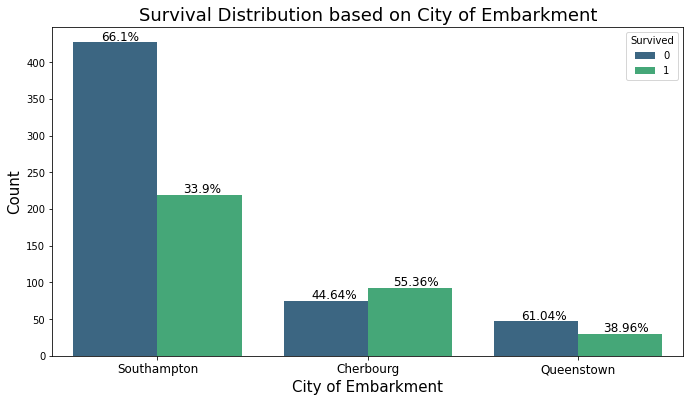

In [21]:
#Visualising Embarked w.r.t Survival:
ebSurvival = temp.groupby(by = 'Embarked')['Survived'].value_counts()
plt.figure(figsize = (8, 4))
sns.countplot(data = temp, x = 'Embarked',  hue = 'Survived', palette = 'viridis')
plt.text(x = -0.27, y = ebSurvival['S'][0] + 3, s = "{}%".format(((ebSurvival['S'][0]/ebSurvival['S'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12, y = ebSurvival['S'][1] + 3, s = "{}%".format(((ebSurvival['S'][1]/ebSurvival['S'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 1, y = ebSurvival['C'][0] + 3, s = "{}%".format(((ebSurvival['C'][0]/ebSurvival['C'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12 + 1, y = ebSurvival['C'][1] + 3, s = "{}%".format(((ebSurvival['C'][1]/ebSurvival['C'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 2, y = ebSurvival['Q'][0] + 3, s = "{}%".format(((ebSurvival['Q'][0]/ebSurvival['Q'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12 + 2, y = ebSurvival['Q'][1] + 3, s = "{}%".format(((ebSurvival['Q'][1]/ebSurvival['Q'].sum())*100).round(2)), fontsize = 12)
plt.title('Survival Distribution based on City of Embarkment', fontsize = 18)
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'], fontsize = 12)
plt.xlabel('City of Embarkment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout(pad = -5)
plt.show()

In [22]:
#Checking the unique cabin counts:
cabin_values = comb2.Cabin.value_counts()
cabin_values

N/A                1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
C22 C26               4
                   ... 
A7                    1
B19                   1
B86                   1
C110                  1
F E57                 1
Name: Cabin, Length: 187, dtype: int64

In [23]:
#Creating a column based on presence of a cabin value:
comb2['IsCabinPresent'] = ['Present' if cabin != 'N/A' else 'Not Present' for cabin in comb2.Cabin]
comb2.sample(5)

,PassengerId,Pclass,Name,Honorific,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsCabinPresent
1241,1242,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",Mrs.,female,45.0,0,1,PC 17759,63.3583,D10 D12,C,Present
308,309,2,"Abelson, Mr. Samuel",Mr.,male,30.0,1,0,P/PP 3381,24.0,N/A,C,Not Present
741,742,1,"Cavendish, Mr. Tyrell William",Mr.,male,36.0,1,0,19877,78.85,C46,S,Present
668,669,3,"Cook, Mr. Jacob",Mr.,male,43.0,0,0,A/5 3536,8.05,N/A,S,Not Present
1240,1241,2,"Walcroft, Miss. Nellie",Miss.,female,31.0,0,0,F.C.C. 13528,21.0,N/A,S,Not Present


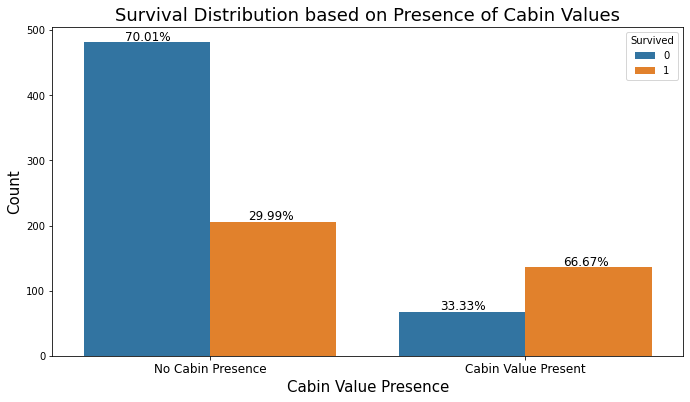

In [101]:
#Visualising presence of cabin w.r.t Survival
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
cabSurvival = temp.groupby(by = 'IsCabinPresent')['Survived'].value_counts()
plt.figure(figsize = (8, 4))
sns.countplot(data = temp, x = 'IsCabinPresent',  hue = 'Survived')
plt.text(x = -0.27, y = cabSurvival['Not Present'][0] + 3, s = "{}%".format(((cabSurvival['Not Present'][0]/cabSurvival['Not Present'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12, y = cabSurvival['Not Present'][1] + 3, s = "{}%".format(((cabSurvival['Not Present'][1]/cabSurvival['Not Present'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 1, y = cabSurvival['Present'][0] + 3, s = "{}%".format(((cabSurvival['Present'][0]/cabSurvival['Present'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12 + 1, y = cabSurvival['Present'][1] + 3, s = "{}%".format(((cabSurvival['Present'][1]/cabSurvival['Present'].sum())*100).round(2)), fontsize = 12)
plt.title('Survival Distribution based on Presence of Cabin Values', fontsize = 18)
plt.xticks([0, 1], ['No Cabin Presence', 'Cabin Value Present'], fontsize = 12)
plt.xlabel('Cabin Value Presence', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout(pad = -5)
plt.show()


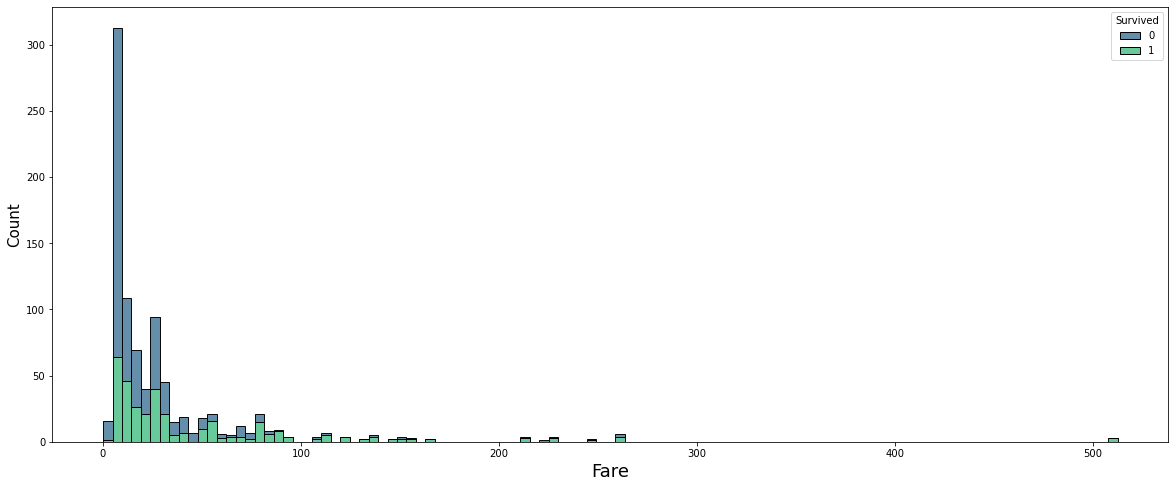

In [25]:
#Visualising the fare distribution w.r.t survival:
plt.figure(figsize = (20, 8))
sns.histplot(x = 'Fare', data = temp, hue = 'Survived', multiple = 'stack', palette = 'viridis')
plt.xlabel('Fare', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [26]:
#Calculating the quartiles of 'Fare':
Q1 = comb2.Fare.quantile(0.25)
Q2 = comb2.Fare.quantile(0.50)
Q3 = comb2.Fare.quantile(0.75)

print(type(Q1))

print("\n'Very Low Fare' Range:", 0, "-", round(Q1, 2))
print("\n'Low Fare' Range:", round(Q1, 2), "-", round(Q2, 2))
print("\n'Medium Fare' Range:", round(Q2, 2), "-", round(Q3, 2))
print("\n'High Fare' Range:", round(Q3, 2), "-", round(max(comb2.Fare), 2), '\n\n')


<class 'float'>

'Very Low Fare' Range: 0 - 7.9

'Low Fare' Range: 7.9 - 14.45

'Medium Fare' Range: 14.45 - 31.27

'High Fare' Range: 31.27 - 512.33 




In [27]:
#Creating fare groups:
comb2.insert(10, 'FareGroup', np.nan)

comb2.loc[(comb2.Fare <= Q1), 'FareGroup'] = 'VeryLowFare'
comb2.loc[(comb2.Fare > Q1) & (comb2.Fare <= Q2), 'FareGroup'] = 'LowFare'
comb2.loc[(comb2.Fare > Q2) & (comb2.Fare <= Q3), 'FareGroup'] = 'MediumFare'
comb2.loc[(comb2.Fare > Q3), 'FareGroup'] = 'HighFare'

comb2.sample(8)

,PassengerId,Pclass,Name,Honorific,Sex,Age,SibSp,Parch,Ticket,Fare,FareGroup,Cabin,Embarked,IsCabinPresent
549,550,2,"Davies, Master. John Morgan Jr",Master.,male,8.0,1,1,C.A. 33112,36.75,HighFare,N/A,S,Not Present
67,68,3,"Crease, Mr. Ernest James",Mr.,male,19.0,0,0,S.P. 3464,8.1583,LowFare,N/A,S,Not Present
1291,1292,1,"Bonnell, Miss. Caroline",Miss.,female,30.0,0,0,36928,164.8667,HighFare,C7,S,Present
952,953,2,"McCrae, Mr. Arthur Gordon",Mr.,male,32.0,0,0,237216,13.5,LowFare,N/A,S,Not Present
948,949,3,"Abelseth, Mr. Olaus Jorgensen",Mr.,male,25.0,0,0,348122,7.65,VeryLowFare,F G63,S,Present
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",Mrs.,female,18.0,0,1,392091,9.35,LowFare,N/A,S,Not Present
778,779,3,"Kilgannon, Mr. Thomas J",Mr.,male,29.0,0,0,36865,7.7375,VeryLowFare,N/A,Q,Not Present
614,615,3,"Brocklebank, Mr. William Alfred",Mr.,male,35.0,0,0,364512,8.05,LowFare,N/A,S,Not Present


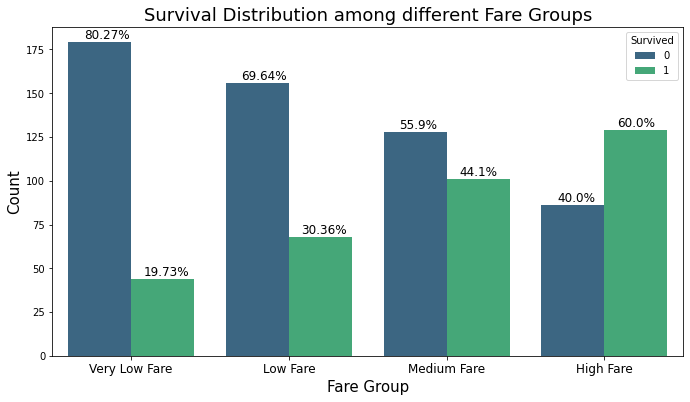

In [28]:
#Visualising the fare group distribution w.r.t survival:
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
fgSurvival = temp.groupby(by = 'FareGroup')['Survived'].value_counts()
plt.figure(figsize = (8, 4))
sns.countplot(data = temp, x = 'FareGroup',  hue = 'Survived', order = ['VeryLowFare', 'LowFare', 'MediumFare', 'HighFare'], palette = 'viridis')
plt.text(x = -0.30, y = fgSurvival['VeryLowFare'][0] + 2, s = "{}%".format(((fgSurvival['VeryLowFare'][0]/fgSurvival['VeryLowFare'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.08, y = fgSurvival['VeryLowFare'][1] + 2, s = "{}%".format(((fgSurvival['VeryLowFare'][1]/fgSurvival['VeryLowFare'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.30 + 1, y = fgSurvival['LowFare'][0] + 2, s = "{}%".format(((fgSurvival['LowFare'][0]/fgSurvival['LowFare'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.08 + 1, y = fgSurvival['LowFare'][1] + 2, s = "{}%".format(((fgSurvival['LowFare'][1]/fgSurvival['LowFare'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.30 + 2, y = fgSurvival['MediumFare'][0] + 2, s = "{}%".format(((fgSurvival['MediumFare'][0]/fgSurvival['MediumFare'].sum())*100).round(2)), fontsize = 12)

plt.text(x = 0.08 + 2, y = fgSurvival['MediumFare'][1] + 2, s = "{}%".format(((fgSurvival['MediumFare'][1]/fgSurvival['MediumFare'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.30 + 3, y = fgSurvival['HighFare'][0] + 2, s = "{}%".format(((fgSurvival['HighFare'][0]/fgSurvival['HighFare'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.08 + 3, y = fgSurvival['HighFare'][1] + 2, s = "{}%".format(((fgSurvival['HighFare'][1]/fgSurvival['HighFare'].sum())*100).round(2)), fontsize = 12)
plt.xlabel('Fare Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks([0, 1, 2, 3], ['Very Low Fare', 'Low Fare', 'Medium Fare', 'High Fare'], fontsize = 12)
plt.title('Survival Distribution among different Fare Groups', fontsize = 18)
plt.tight_layout(pad = -5)
plt.show()

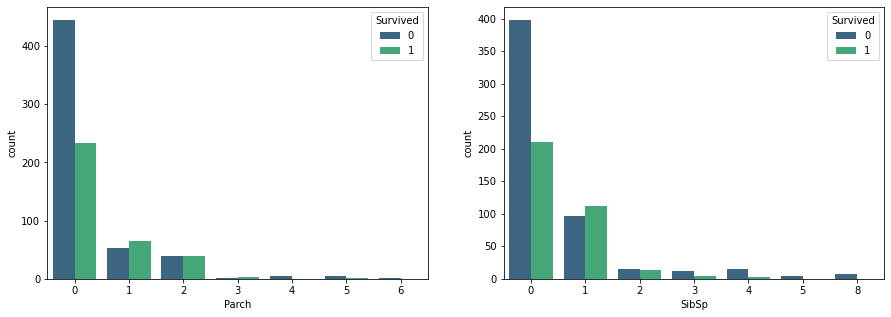

In [29]:
#Visualising number of parents or children (Parch) and number of siblings or spouses (SibSp) w.r.t Survival:
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
cols = ['Parch', 'SibSp']
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
for col, subplot in zip(cols, ax.flatten()):
    sns.countplot(data = temp, x = col,  hue = 'Survived', ax = subplot, palette = 'viridis')
    subplot.legend(loc = 'upper right', title = 'Survived')
plt.show()

In [30]:
#Creating FamilyCount out of Parch and SibSp:
comb2['FamilyCount'] = 1 + comb2['SibSp'] + comb2['Parch']
comb2.head()

,PassengerId,Pclass,Name,Honorific,Sex,Age,SibSp,Parch,Ticket,Fare,FareGroup,Cabin,Embarked,IsCabinPresent,FamilyCount
745,746,1,"Crosby, Capt. Edward Gifford",Capt.,male,70.0,1,1,WE/P 5735,71.0,HighFare,B22,S,Present,3
647,648,1,"Simonius-Blumer, Col. Oberst Alfons",Col.,male,56.0,0,0,13213,35.5,HighFare,A26,C,Present,1
694,695,1,"Weir, Col. John",Col.,male,60.0,0,0,113800,26.55,MediumFare,N/A,S,Not Present,1
1022,1023,1,"Gracie, Col. Archibald IV",Col.,male,53.0,0,0,113780,28.5,MediumFare,C51,C,Present,1
1093,1094,1,"Astor, Col. John Jacob",Col.,male,47.0,1,0,PC 17757,227.525,HighFare,C62 C64,C,Present,2


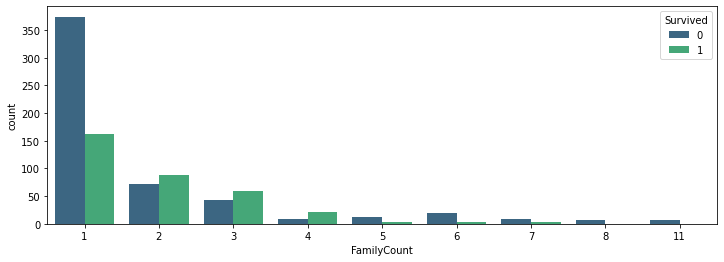

In [31]:
#Visualising number of family members against survival:
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
plt.figure(figsize = (12, 4))
sns.countplot(data = temp, x = 'FamilyCount', hue = 'Survived', palette = 'viridis')
plt.legend(loc = 'upper right', title = 'Survived')
plt.show()

In [32]:
#Creating another feature FamilySize based on groups of family count:
comb2.insert(8, 'FamilySize', np.nan)

comb2.loc[(comb2.FamilyCount == 1), 'FamilySize'] = 'Alone'
comb2.loc[(comb2.FamilyCount > 1) & (comb2.FamilyCount <= 4), 'FamilySize'] = 'Medium'
comb2.loc[(comb2.FamilyCount > 4), 'FamilySize'] = 'Large'

comb2.sample(5)

,PassengerId,Pclass,Name,Honorific,Sex,Age,SibSp,Parch,FamilySize,Ticket,Fare,FareGroup,Cabin,Embarked,IsCabinPresent,FamilyCount
530,531,2,"Quick, Miss. Phyllis May",Miss.,female,2.0,1,1,Medium,26360,26.0,MediumFare,N/A,S,Not Present,3
199,200,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",Miss.,female,24.0,0,0,Alone,248747,13.0,LowFare,N/A,S,Not Present,1
11,12,1,"Bonnell, Miss. Elizabeth",Miss.,female,58.0,0,0,Alone,113783,26.55,MediumFare,C103,S,Present,1
997,998,3,"Buckley, Mr. Daniel",Mr.,male,21.0,0,0,Alone,330920,7.8208,VeryLowFare,N/A,Q,Not Present,1
911,912,1,"Rothschild, Mr. Martin",Mr.,male,55.0,1,0,Medium,PC 17603,59.4,HighFare,N/A,C,Not Present,2


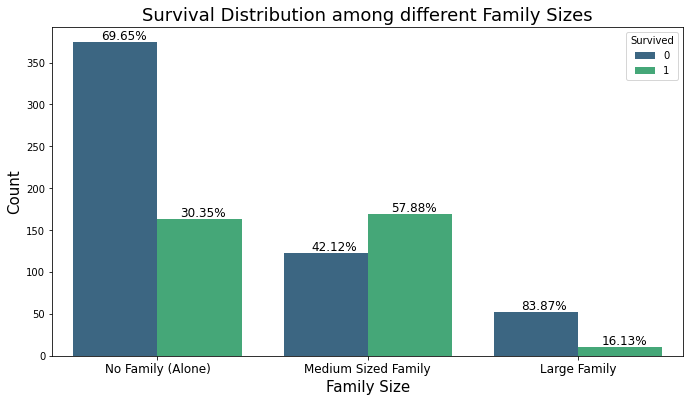

In [33]:
#Visualising family sizes against survival:
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
fsSurvival = temp.groupby(by = 'FamilySize')['Survived'].value_counts()
plt.figure(figsize = (8, 4))
sns.countplot(data = temp, x = 'FamilySize', hue = 'Survived', order = ['Alone', 'Medium', 'Large'], palette = 'viridis')
plt.text(x = -0.27, y = fsSurvival['Alone'][0] + 3, s = "{}%".format(((fsSurvival['Alone'][0]/fsSurvival['Alone'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.11, y = fsSurvival['Alone'][1] + 3, s = "{}%".format(((fsSurvival['Alone'][1]/fsSurvival['Alone'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 1, y = fsSurvival['Medium'][0] + 3, s = "{}%".format(((fsSurvival['Medium'][0]/fsSurvival['Medium'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.11 + 1, y = fsSurvival['Medium'][1] + 3, s = "{}%".format(((fsSurvival['Medium'][1]/fsSurvival['Medium'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 2, y = fsSurvival['Large'][0] + 3, s = "{}%".format(((fsSurvival['Large'][0]/fsSurvival['Large'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.11 + 2, y = fsSurvival['Large'][1] + 3, s = "{}%".format(((fsSurvival['Large'][1]/fsSurvival['Large'].sum())*100).round(2)), fontsize = 12)
plt.xlabel('Family Size', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks([0, 1, 2], ['No Family (Alone)', 'Medium Sized Family', 'Large Family'], fontsize = 12)

plt.title('Survival Distribution among different Family Sizes', fontsize = 18)
plt.tight_layout(pad = -5)
plt.show()

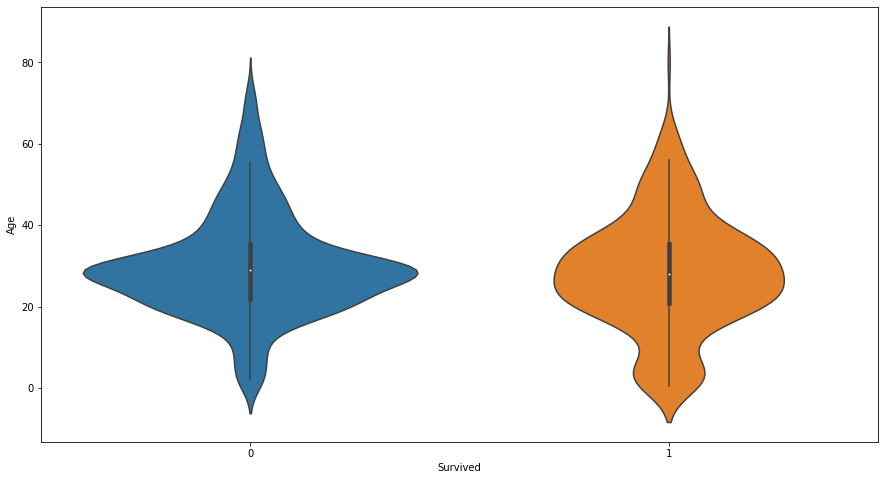

In [96]:
#Visualising the age distribution w.r.t survival:
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
plt.figure(figsize = (15,8))
#sns.swarmplot(data = temp, x = 'Survived', y = 'Age', palette = 'viridis')
sns.violinplot(data = temp, x = "Survived", y="Age");
plt.show()

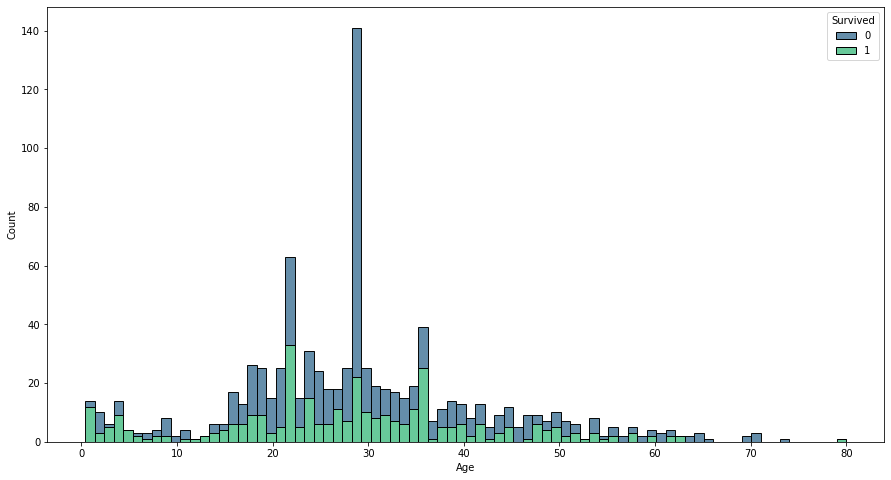

In [35]:
#Visualising ages w.r.t survival:
plt.figure(figsize = (15, 8))
sns.histplot(data = temp, x = 'Age', hue = 'Survived', multiple = 'stack', bins = 80, palette = 'viridis')
plt.show()

In [36]:
#Dropping columns that are no longer required:
comb2.drop(['PassengerId', 'Name', 'Ticket', 'Parch', 'SibSp', 'FamilyCount', 'Fare', 'Cabin'], axis  = 1, inplace = True)
comb2.head()

,Pclass,Honorific,Sex,Age,FamilySize,FareGroup,Embarked,IsCabinPresent
745,1,Capt.,male,70.0,Medium,HighFare,S,Present
647,1,Col.,male,56.0,Alone,HighFare,C,Present
694,1,Col.,male,60.0,Alone,MediumFare,S,Not Present
1022,1,Col.,male,53.0,Alone,MediumFare,C,Present
1093,1,Col.,male,47.0,Medium,HighFare,C,Present


In [37]:
#Checking the datatypes of the features in the dataframe:
comb2.dtypes

Pclass            object
Honorific         object
Sex               object
Age               object
FamilySize        object
FareGroup         object
Embarked          object
IsCabinPresent    object
dtype: object

In [38]:
comb2['Age'] = comb2['Age'].astype(np.float64)
comb2.dtypes

Pclass             object
Honorific          object
Sex                object
Age               float64
FamilySize         object
FareGroup          object
Embarked           object
IsCabinPresent     object
dtype: object

In [39]:
#Dummy Encoding the categorical variables:
categoricals = comb2.select_dtypes(exclude = ['int64', 'float64'])
categorical_dummies = pd.get_dummies(categoricals, drop_first = False)
categorical_dummies.head()

C:\Users\hyeji\anaconda3\envs\PythonData\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Pclass_1,Pclass_2,Pclass_3,Honorific_Capt.,Honorific_Col.,Honorific_Don.,Honorific_Dona.,Honorific_Dr.,Honorific_Jonkheer.,Honorific_Lady.,...,FamilySize_Medium,FareGroup_HighFare,FareGroup_LowFare,FareGroup_MediumFare,FareGroup_VeryLowFare,Embarked_C,Embarked_Q,Embarked_S,IsCabinPresent_Not Present,IsCabinPresent_Present
745,1,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
647,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
694,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1022,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1093,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1


In [40]:
#Fetching the numerical columns:
numericals = comb2.drop(categoricals, axis = 1)
numericals.head()

,Age
745,70.0
647,56.0
694,60.0
1022,53.0
1093,47.0


In [41]:
#Combining unmarried women into a single feature:
categorical_dummies['YoungWomen'] = categorical_dummies['Honorific_Miss.'] + categorical_dummies['Honorific_Mlle.']

#Combining married women into a single feature:
categorical_dummies['MarriedWomen'] = categorical_dummies['Honorific_Mrs.'] + categorical_dummies['Honorific_Mme.'] + categorical_dummies['Honorific_Ms.']

#Combining the rarer honorifics into a single feature (grouping them into further subsets would just create more noise for the model):
categorical_dummies['RareHonorific'] = categorical_dummies['Honorific_Capt.'] + categorical_dummies['Honorific_Col.'] + categorical_dummies['Honorific_Don.'] + categorical_dummies['Honorific_Dona.'] + categorical_dummies['Honorific_Dr.'] + categorical_dummies['Honorific_Jonkheer.']  + categorical_dummies['Honorific_Lady.'] + categorical_dummies['Honorific_Major.'] + categorical_dummies['Honorific_Sir.'] + categorical_dummies['Honorific_the Countess.'] + categorical_dummies['Honorific_Rev.']

In [42]:
#Dropping all the features that have since been combined into a new feature:
categorical_dummies.drop(['Honorific_Miss.', 'Honorific_Mlle.', 'Honorific_Mrs.', 'Honorific_Mme.', 'Honorific_Ms.', 'Honorific_Dona.', 'Honorific_Lady.', 'Honorific_the Countess.', 'Honorific_Rev.', 'Honorific_Jonkheer.', 'Honorific_Capt.', 'Honorific_Col.', 'Honorific_Major.', 'Honorific_Don.', 'Honorific_Sir.', 'Honorific_Dr.'], 
                         axis = 1, inplace = True)

categorical_dummies.head()

,Pclass_1,Pclass_2,Pclass_3,Honorific_Master.,Honorific_Mr.,Sex_female,Sex_male,FamilySize_Alone,FamilySize_Large,FamilySize_Medium,...,FareGroup_MediumFare,FareGroup_VeryLowFare,Embarked_C,Embarked_Q,Embarked_S,IsCabinPresent_Not Present,IsCabinPresent_Present,YoungWomen,MarriedWomen,RareHonorific
745,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,1
647,1,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,1
694,1,0,0,0,0,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
1022,1,0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,0,1
1093,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1


In [43]:
#Re-combining the numerical and categorical variables:
x = pd.concat([numericals, categorical_dummies], axis = 1)
x.head()

,Age,Pclass_1,Pclass_2,Pclass_3,Honorific_Master.,Honorific_Mr.,Sex_female,Sex_male,FamilySize_Alone,FamilySize_Large,...,FareGroup_MediumFare,FareGroup_VeryLowFare,Embarked_C,Embarked_Q,Embarked_S,IsCabinPresent_Not Present,IsCabinPresent_Present,YoungWomen,MarriedWomen,RareHonorific
745,70.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
647,56.0,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,1
694,60.0,1,0,0,0,0,0,1,1,0,...,1,0,0,0,1,1,0,0,0,1
1022,53.0,1,0,0,0,0,0,1,1,0,...,1,0,1,0,0,0,1,0,0,1
1093,47.0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [138]:
#Sorting the whole data by index:
x = x.sort_index(ascending = True)
x.tail()
print(len(x))

1309


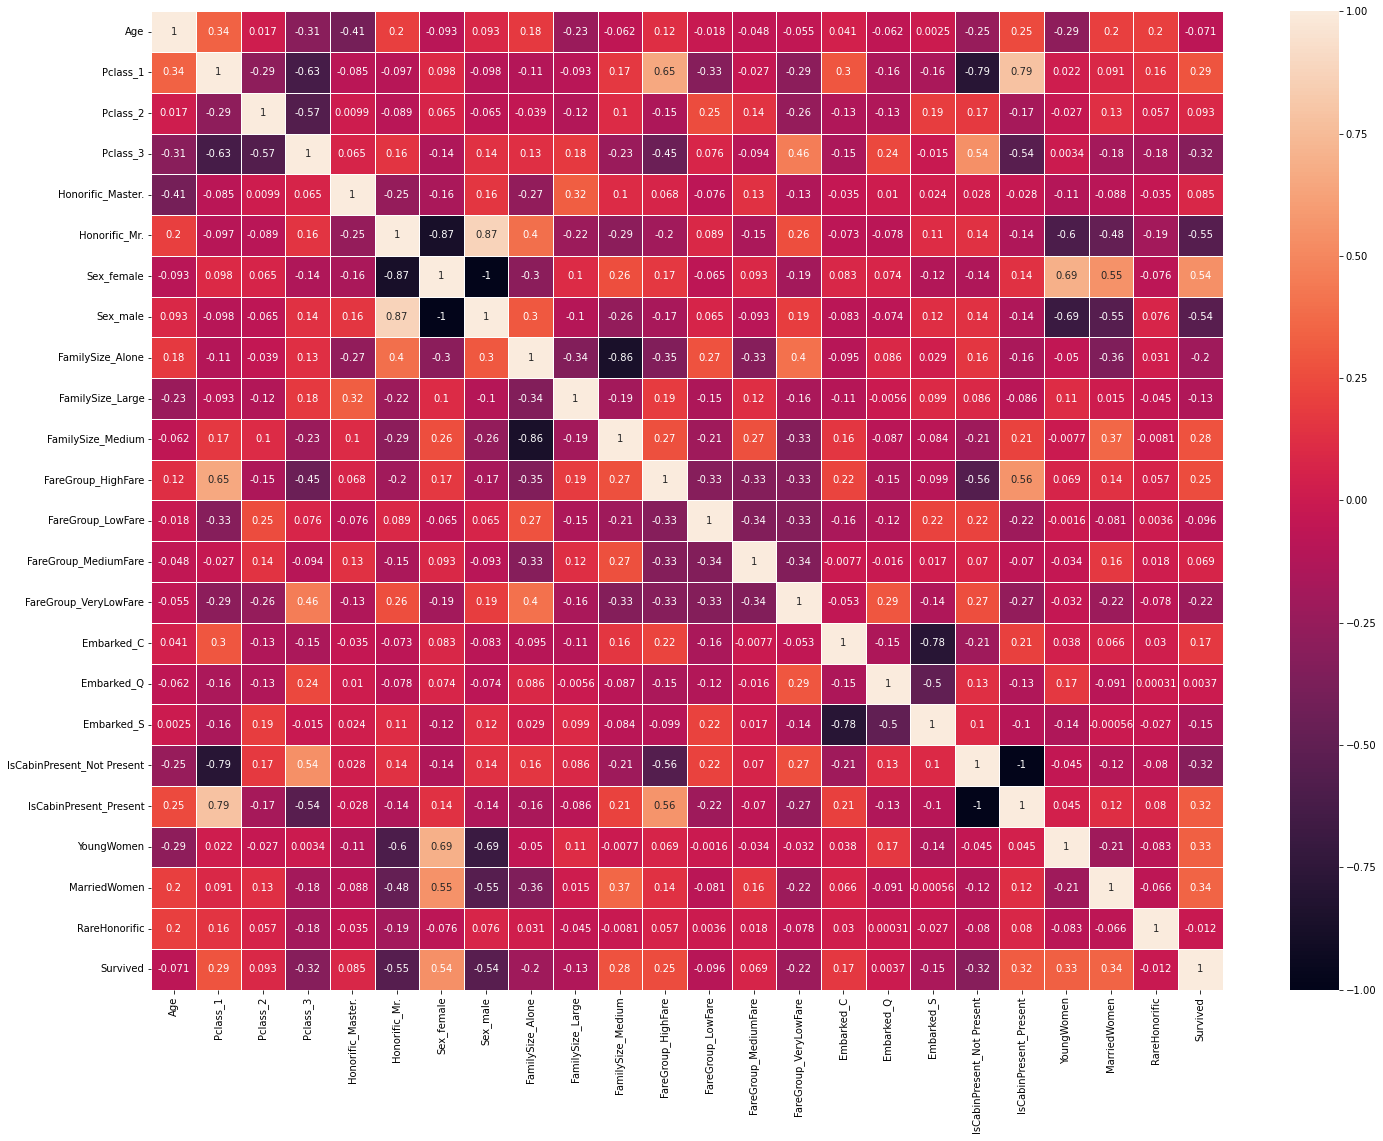

In [45]:
#Correlation check:
temp = pd.concat([x.iloc[:891], y_train], axis = 1)
corr = temp.corr()
plt.figure(figsize = (24,18))
sns.heatmap(corr, cbar = True, annot = True, linewidths = 0.5)
plt.show()


In [46]:
#Removing Sex_male and IsCabinPresent_Not Present features as they're dummy encoded from features that contained only binary classes:
x.drop(['Sex_male', 'IsCabinPresent_Not Present'], axis = 1, inplace = True)

In [47]:
#Scaling the independent features:
scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.fit_transform(x)
print(X_scaled[0:5])
len(X_scaled)

[[-0.5648354  -0.57235147 -0.51808383  0.91992518 -0.22108416  0.85392868
  -0.74349692 -1.23375767 -0.25851434  1.41259454 -0.57235147 -0.56999893
  -0.57823239  1.69831475 -0.50976981 -0.32204029  0.65501092 -0.53937651
  -0.50023872 -0.42466769 -0.15051993]
 [ 0.65108668  1.74717818 -0.51808383 -1.08704492 -0.22108416 -1.17105799
   1.34499549 -1.23375767 -0.25851434  1.41259454  1.74717818 -0.56999893
  -0.57823239 -0.588819    1.96166973 -0.32204029 -1.52669211  1.85399249
  -0.50023872  2.35478237 -0.15051993]
 [-0.26085488 -0.57235147 -0.51808383  0.91992518 -0.22108416 -1.17105799
   1.34499549  0.81053194 -0.25851434 -0.70791722 -0.57235147  1.75438924
  -0.57823239 -0.588819   -0.50976981 -0.32204029  0.65501092 -0.53937651
   1.99904557 -0.42466769 -0.15051993]
 [ 0.42310129  1.74717818 -0.51808383 -1.08704492 -0.22108416 -1.17105799
   1.34499549 -1.23375767 -0.25851434  1.41259454  1.74717818 -0.56999893
  -0.57823239 -0.588819   -0.50976981 -0.32204029  0.65501092  1.8539

1309

In [48]:
#Splitting the transformed data back into training and testing sets:
X_train = X_scaled[:891]
X_test = X_scaled[891:]

In [49]:
print(X_train.shape)
print(y_train.shape)

(891, 21)
(891,)


In [50]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
# Note shorter method by setting desired variance explained
# 90% of the explanined varience preserved in dimensionality 
# reduction
pca = PCA(n_components=0.8)
    
# Get two principal components.
X_pca = pca.fit_transform(X_scaled)
    
# variance explained
pca.explained_variance_ratio_.sum()

0.8390952966374721

In [53]:
# shows all 10 components and the significance of each feature on the principle component
print(abs( pca.components_ ))

[[1.07691687e-01 3.37574063e-01 2.04036049e-02 3.08811371e-01
  2.43488685e-02 2.73794657e-01 2.57207160e-01 3.09719825e-01
  4.08619372e-02 3.00271240e-01 3.32001862e-01 1.53572890e-01
  9.63796180e-02 2.71776580e-01 1.84829174e-01 1.06259827e-01
  9.55183744e-02 3.21296891e-01 7.22982538e-02 2.55453358e-01
  6.27805720e-02]
 [3.53317648e-01 3.16855013e-01 5.31762175e-02 2.30567240e-01
  2.00017204e-01 3.93691702e-01 3.44141595e-01 2.42313640e-01
  2.03005638e-01 1.47035422e-01 1.63552341e-01 1.33758923e-02
  1.74416812e-01 2.47602717e-02 1.43396990e-01 1.24280235e-01
  4.74720716e-02 2.60442397e-01 3.07482285e-01 1.22530010e-01
  1.00929915e-01]
 [3.19943304e-02 1.23970052e-01 3.93368698e-01 2.15198736e-01
  6.35566254e-02 1.04021411e-01 1.46281666e-01 1.18021949e-01
  2.64673728e-03 1.23782451e-01 8.65560208e-02 2.74719456e-01
  1.70338099e-01 3.53793596e-01 2.76661863e-01 3.47187886e-01
  4.65239507e-01 9.21764204e-02 2.30069499e-01 6.38636920e-02
  2.92934021e-02]
 [1.84283660e-01

In [54]:
len(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.26927204 2.82631393 2.45431787 1.91053759 1.61842237 1.35515492
 1.19027608 1.03671245 0.97346569]
[0.20314336 0.13448356 0.116783   0.09090848 0.07700886 0.06448189
 0.05663651 0.04932955 0.0463201 ]


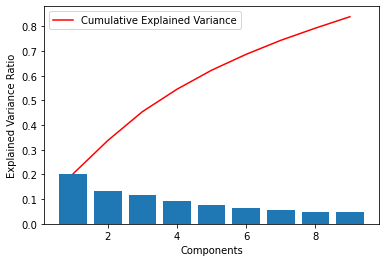

In [55]:
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Components')
plt.plot(range(1, len(pca.explained_variance_ratio_ ) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

# Effect of variables on each components

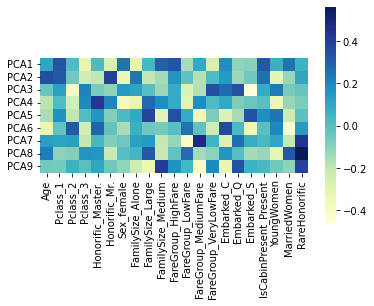

In [56]:
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(x.columns),
                 cbar_kws={"orientation": "vertical"})
ax.set_aspect("equal")

In [57]:
components=[]
for i in range(len(pca.components_)):
    components.append(f'pc{i+1}')
    
# Transform PCA data to a DataFrame
df_X_pca = pd.DataFrame(
    data=X_pca, columns = components
)
df_X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.253135,-0.340449,-0.040262,1.577187,-0.542657,-1.211717,-0.737779,-0.934767,1.521010
1,4.908070,0.834366,1.426110,-0.063349,-0.785747,-0.469480,-1.585023,0.710567,-0.025554
2,-0.953359,-1.798062,0.097197,-2.330345,1.464993,0.326064,-0.759579,0.186054,-0.431769
3,4.218331,0.295848,-0.265364,-0.338022,0.676079,-2.055094,-0.744502,-0.051751,0.922122
4,-2.152002,0.728035,-1.015845,-0.397490,0.516291,-0.119997,-1.015856,0.682473,-0.196509


In [58]:
df_X_pca.shape

(1309, 9)

C:\Users\hyeji\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


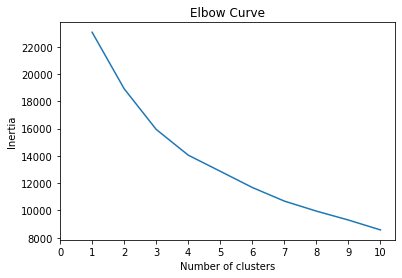

In [59]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# K-means Clustering

In [60]:
# Initialize the k-means model
model2 = KMeans(n_clusters=2, random_state=0)

# Fit the model
model2.fit(df_X_pca)

# Predict clusters
predictions2 = model2.predict(df_X_pca)

# Add the predicted class column to the dataframe
df_X_pca['y'] = y_train
df_X_pca["class"] = model2.labels_
df_X_pca2 = df_X_pca.copy()
df_X_pca2.head()


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,y,class
0,-1.253135,-0.340449,-0.040262,1.577187,-0.542657,-1.211717,-0.737779,-0.934767,1.521010,0.0,0
1,4.908070,0.834366,1.426110,-0.063349,-0.785747,-0.469480,-1.585023,0.710567,-0.025554,1.0,1
2,-0.953359,-1.798062,0.097197,-2.330345,1.464993,0.326064,-0.759579,0.186054,-0.431769,1.0,0
3,4.218331,0.295848,-0.265364,-0.338022,0.676079,-2.055094,-0.744502,-0.051751,0.922122,1.0,1
4,-2.152002,0.728035,-1.015845,-0.397490,0.516291,-0.119997,-1.015856,0.682473,-0.196509,0.0,0


In [61]:
model2.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [62]:
print(len(df_X_pca2.loc[df_X_pca2["class"] == 1]))
print(len(df_X_pca2.loc[df_X_pca2["class"] == 0]))

321
988


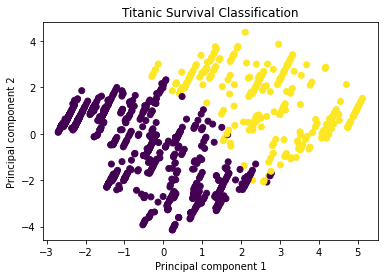

In [93]:
# Visualize the clusters
# only choosing 2 of the 10 components
plt.scatter(x=df_X_pca2['pc1'], y=df_X_pca2['pc2'], c=df_X_pca2['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Titanic Survival Classification')

plt.show()

In [64]:
df_X_pca2

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,y,class
0,-1.253135,-0.340449,-0.040262,1.577187,-0.542657,-1.211717,-0.737779,-0.934767,1.521010,0.0,0
1,4.908070,0.834366,1.426110,-0.063349,-0.785747,-0.469480,-1.585023,0.710567,-0.025554,1.0,1
2,-0.953359,-1.798062,0.097197,-2.330345,1.464993,0.326064,-0.759579,0.186054,-0.431769,1.0,0
3,4.218331,0.295848,-0.265364,-0.338022,0.676079,-2.055094,-0.744502,-0.051751,0.922122,1.0,1
4,-2.152002,0.728035,-1.015845,-0.397490,0.516291,-0.119997,-1.015856,0.682473,-0.196509,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,-2.201106,0.566932,-1.001257,-0.313462,0.585671,0.026418,-1.074964,0.580177,-0.171498,NaN,0
1305,3.362889,2.694666,1.905913,-1.271397,0.609267,1.943957,2.678410,4.190900,1.634766,NaN,1
1306,-2.387984,0.909732,0.423373,0.310528,0.094034,-1.340054,0.112271,-0.115705,0.129011,NaN,0
1307,-2.201106,0.566932,-1.001257,-0.313462,0.585671,0.026418,-1.074964,0.580177,-0.171498,NaN,0


In [78]:
df_survived = df_X_pca2.loc[df_X_pca2["class"] == 1]
df_notsurvived = df_X_pca2.loc[df_X_pca2["class"] == 0]
print(len(df_survived))
print(len(df_notsurvived))
df_survived

321
988


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,y,class
1,4.908070,0.834366,1.426110,-0.063349,-0.785747,-0.469480,-1.585023,0.710567,-0.025554,1.0,1
3,4.218331,0.295848,-0.265364,-0.338022,0.676079,-2.055094,-0.744502,-0.051751,0.922122,1.0,1
6,1.302316,3.469679,-0.146451,-0.090413,1.698121,-0.781511,0.619686,-0.536479,-0.039070,0.0,1
11,2.059674,0.510782,0.341134,-1.997516,0.855030,-0.693126,2.389774,-1.081073,-1.667726,1.0,1
23,1.089531,2.771568,-0.083235,0.273709,1.998768,-0.147045,0.363552,-0.979762,0.069313,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1294,0.230525,1.852879,-0.277101,0.430760,1.691272,0.143808,0.175331,-0.866275,0.035364,NaN,1
1295,2.599686,2.043286,0.481460,1.623720,-2.070775,0.830990,0.339488,-0.820416,-0.944374,NaN,1
1298,3.204653,3.013095,1.058289,1.317875,-0.510248,0.700615,-0.977298,-0.431253,0.365651,NaN,1
1302,4.078914,0.027180,1.934685,-0.547070,-0.605024,-1.241581,-0.017766,0.321033,1.958450,NaN,1


# T-SNE 

In [122]:
from sklearn.manifold import TSNE

In [123]:
# Initialize t-SNE model
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=3000)

In [124]:
df_X_pca.iloc[:, 0:9]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.253135,-0.340449,-0.040262,1.577187,-0.542657,-1.211717,-0.737779,-0.934767,1.521010
1,4.908070,0.834366,1.426110,-0.063349,-0.785747,-0.469480,-1.585023,0.710567,-0.025554
2,-0.953359,-1.798062,0.097197,-2.330345,1.464993,0.326064,-0.759579,0.186054,-0.431769
3,4.218331,0.295848,-0.265364,-0.338022,0.676079,-2.055094,-0.744502,-0.051751,0.922122
4,-2.152002,0.728035,-1.015845,-0.397490,0.516291,-0.119997,-1.015856,0.682473,-0.196509
...,...,...,...,...,...,...,...,...,...
1304,-2.201106,0.566932,-1.001257,-0.313462,0.585671,0.026418,-1.074964,0.580177,-0.171498
1305,3.362889,2.694666,1.905913,-1.271397,0.609267,1.943957,2.678410,4.190900,1.634766
1306,-2.387984,0.909732,0.423373,0.310528,0.094034,-1.340054,0.112271,-0.115705,0.129011
1307,-2.201106,0.566932,-1.001257,-0.313462,0.585671,0.026418,-1.074964,0.580177,-0.171498


In [125]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_X_pca.iloc[:, 0:9])

C:\Users\hyeji\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\hyeji\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1309 samples in 0.003s...
[t-SNE] Computed neighbors for 1309 samples in 0.121s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1309
[t-SNE] Computed conditional probabilities for sample 1309 / 1309
[t-SNE] Mean sigma: 0.282958
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.205109
[t-SNE] KL divergence after 3000 iterations: 0.257708


In [126]:
# The dataset has 2 columns
tsne_features

array([[ 8.054234 , -5.5329647,  1.8277677],
       [-9.617929 ,  1.845428 ,  5.2696886],
       [-9.106087 , -0.528764 , -7.1991816],
       ...,
       [10.79916  ,  1.7658932, 10.349027 ],
       [10.910558 , -0.9150187, -8.503068 ],
       [ 0.2247199, -6.821044 , -0.9377288]], dtype=float32)

In [127]:
# Prepare to plot the dataset

# The first column of transformed features
X1 = tsne_features[:,0]
X2 = tsne_features[:,1]
# The second column of transformed features
y = tsne_features[:,2]

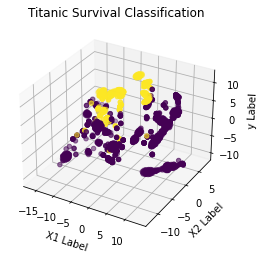

In [134]:
# Visualize the clusters
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, X2, y, c=df_X_pca2['class'])
plt.title('Titanic Survival Classification')

ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('y Label')

plt.show()

#    # Supervised ML

In [136]:
X_scaled

array([[-0.5648354 , -0.57235147, -0.51808383, ..., -0.50023872,
        -0.42466769, -0.15051993],
       [ 0.65108668,  1.74717818, -0.51808383, ..., -0.50023872,
         2.35478237, -0.15051993],
       [-0.26085488, -0.57235147, -0.51808383, ...,  1.99904557,
        -0.42466769, -0.15051993],
       ...,
       [ 0.68908425, -0.57235147, -0.51808383, ..., -0.50023872,
        -0.42466769, -0.15051993],
       [-0.03286949, -0.57235147, -0.51808383, ..., -0.50023872,
        -0.42466769, -0.15051993],
       [-1.93274774, -0.57235147, -0.51808383, ..., -0.50023872,
        -0.42466769, -0.15051993]])

In [137]:
print(len(X_scaled))

1309


In [149]:
X_train_super = X_scaled[:891]

In [155]:
print(len(X_train_super))
X_train_super


891


array([[-0.5648354 , -0.57235147, -0.51808383, ..., -0.50023872,
        -0.42466769, -0.15051993],
       [ 0.65108668,  1.74717818, -0.51808383, ..., -0.50023872,
         2.35478237, -0.15051993],
       [-0.26085488, -0.57235147, -0.51808383, ...,  1.99904557,
        -0.42466769, -0.15051993],
       ...,
       [-0.5648354 , -0.57235147, -0.51808383, ...,  1.99904557,
        -0.42466769, -0.15051993],
       [-0.26085488,  1.74717818, -0.51808383, ..., -0.50023872,
        -0.42466769, -0.15051993],
       [ 0.1951159 , -0.57235147, -0.51808383, ..., -0.50023872,
        -0.42466769, -0.15051993]])

In [161]:
y_train_super = np.array(train.Survived)
print(len(y_train_super))

891


In [162]:
from sklearn.model_selection import train_test_split

In [163]:
# Train a Logistic Regression model print the model score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score


X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X_train_super, y_train_super, random_state=4)

clf = LogisticRegression(random_state=0)

clf.fit(X_train_lg, y_train_lg)



LogisticRegression(random_state=0)

In [164]:
prediction = clf.predict(X_test_lg)

In [169]:
count = 0

for i in range(len(prediction)):
    if prediction[i] == y_test_lg[i]:
        count += 1
        
print(count)
print(len(y_test_lg))

print(count/len(y_test_lg))

194
223
0.8699551569506726


In [170]:
print('r2_score:', r2_score(y_test_lg, prediction))
print('Logistic Regression model score test set: ', clf.score(X_test_lg, y_test_lg))
print('Logistic Regression model score train set: ', clf.score(X_train_lg, y_train_lg))
print('Logistic Regression model score entire set: ', clf.score(X_train_super, y_train_super))

r2_score: 0.40940639269406387
Logistic Regression model score test set:  0.8699551569506726
Logistic Regression model score train set:  0.8218562874251497
Logistic Regression model score entire set:  0.8338945005611672


In [172]:
# Accuracy score calculation using accuracy_score function

from sklearn.metrics import accuracy_score

accuracy_score(y_test_lg, prediction)

0.8699551569506726

# Random Forest Model

In [179]:
# Train a Random Forest Classifier model and print the model score

from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(max_depth=2, random_state=0)

clf2.fit(X_train_lg, y_train_lg)
prediction2 = clf2.predict(X_test_lg)

print('r2_score:', r2_score(y_test_lg, prediction2))

print('Random Forest model score test set: ', clf2.score(X_test_lg, y_test_lg))
print('Random Forest model score train set: ', clf2.score(X_train_lg, y_train_lg))
print('Random Forest model score entire set:', clf2.score(X_train_super, y_train_super))

r2_score: 0.2668493150684931
Random Forest model score test set:  0.8385650224215246
Random Forest model score train set:  0.8068862275449101
Random Forest model score entire set: 0.8148148148148148


In [173]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Logistic Regression')
print(confusion_matrix(y_test_lg, prediction))

print('\n\nConfusion Matrix - Random Forest')
print(confusion_matrix(y_test_lg, prediction2))

Confusion Matrix - Logistic Regression
[[138  12]
 [ 17  56]]


Confusion Matrix - Random Forest
[[136  14]
 [ 22  51]]


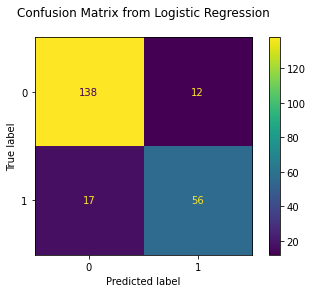

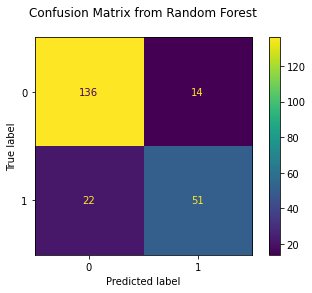

In [174]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(clf, X_test_lg, y_test_lg)
plt.title("Confusion Matrix from Logistic Regression\n")

plot_confusion_matrix(clf2, X_test_lg, y_test_lg)
plt.title("Confusion Matrix from Random Forest\n")
plt.show()

# Support Vection Machine

In [175]:
from sklearn import svm

clf3 = svm.SVC()
clf3.fit(X_train_lg, y_train_lg)

SVC()

In [176]:
prediction3 = clf3.predict(X_test_lg)

In [178]:
# Accuracy score calculation using for loop

count3 = 0

for i in range(len(prediction3)):
    
    if prediction3[i] == y_test_lg[i]:
        count3 += 1
        
print('Accuracy Score of Random Forest: ', count3/len(prediction3))

Accuracy Score of Random Forest:  0.8565022421524664


In [180]:
print('r2_score:', r2_score(y_test_lg, prediction3))

print('Support Vector Machine score test set: ', clf3.score(X_test_lg, y_test_lg))
print('Support Vector Machine score train set: ', clf3.score(X_train_lg, y_train_lg))
print('Support Vector Machine score entire set:', clf3.score(X_train_super, y_train_super))

r2_score: 0.348310502283105
Support Vector Machine score test set:  0.8565022421524664
Support Vector Machine score train set:  0.844311377245509
Support Vector Machine score entire set: 0.8473625140291807


In [182]:
print('\n\nConfusion Matrix - Support Vector Machine')
print(confusion_matrix(y_test_lg, prediction3))



Confusion Matrix - Support Vector Machine
[[140  10]
 [ 22  51]]


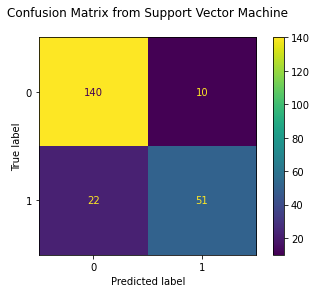

In [183]:
plot_confusion_matrix(clf3, X_test_lg, y_test_lg)
plt.title("Confusion Matrix from Support Vector Machine\n")
plt.show()